In [27]:
!pip install tensorflow scikit-learn opencv-python



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [4]:
# Define the paths to your training data folders
train_data_dir = r'real_and_fake_face_detection\real_and_fake_face'  # Replace with your actual path
batch_size = 32
img_height, img_width = 224, 224

# Image data generator with rescaling
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create training generator
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 2041 images belonging to 2 classes.


In [5]:
# Load the ResNet50 model pre-trained on ImageNet, excluding the final layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
feature_extractor_model = Model(inputs=base_model.input, outputs=x)

# Extract features for the entire training dataset
train_features = []
train_labels = []

# Iterate over the training data to extract features
for images, labels in train_generator:
    features = feature_extractor_model.predict(images)
    train_features.extend(features)
    train_labels.extend(labels)
    
    if len(train_features) >= train_generator.samples:  # Break after processing the full dataset
        break

train_features = np.array(train_features)
train_labels = np.array(train_labels)
print(f"Feature shape: {train_features.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [6]:
unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)


Unique labels: [0. 1.]


In [7]:
# Initialize and train SVM on the extracted features
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(train_features, train_labels)


SVC(kernel='linear', probability=True)

In [ ]:
import cv2

def predict_image(image_path, feature_extractor_model, svm_classifier):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_height, img_width))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    # Extract features
    features = feature_extractor_model.predict(img)
    
    # Predict with SVM
    prediction = svm_classifier.predict(features)
    probability = svm_classifier.predict_proba(features)
    
    return "Real" if prediction[0] == 1 else "Fake", probability[0][int(prediction[0])]

image_path = r'D:\MINOR_PROJECT\real_and_fake_face_detection\real_and_fake_face\training_fake\easy_6_1110.jpg'  
result, confidence = predict_image(image_path, feature_extractor_model, svm_classifier)
print(f"Prediction: {result} image")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Prediction: Fake image


<h1>real-vs-fake</h1>

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

train_data_dir = r'D:\MINOR_PROJECT\real_vs_fake\real-vs-fake\test'  # Replace with your actual path
batch_size = 32
img_height, img_width = 224, 224

# Image data generator with rescaling
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create training generator
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Load ResNet50 model 
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  
feature_extractor_model = Model(inputs=base_model.input, outputs=x)

# Extract features and labels for the entire training dataset
train_features = []
train_labels = []

for images, labels in train_generator:
    features = feature_extractor_model.predict(images)
    train_features.extend(features)
    train_labels.extend(labels)
    
    if len(train_features) >= train_generator.samples:  # Processed full dataset
        break

# Convert to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)
print(f"Feature shape: {train_features.shape}")
print("Unique labels in train_labels:", np.unique(train_labels))

# Initialize and train SVM on the extracted features
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(train_features, train_labels)

# Define the prediction function
import cv2

def predict_image(image_path, feature_extractor_model, svm_classifier):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_height, img_width))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    # Extract features
    features = feature_extractor_model.predict(img)
    
    # Predict with SVM
    prediction = svm_classifier.predict(features)
    probability = svm_classifier.predict_proba(features)

    # Return results
    return "Real" if prediction[0] == 1 else "Fake", probability[0][int(prediction[0])]



Found 20000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━

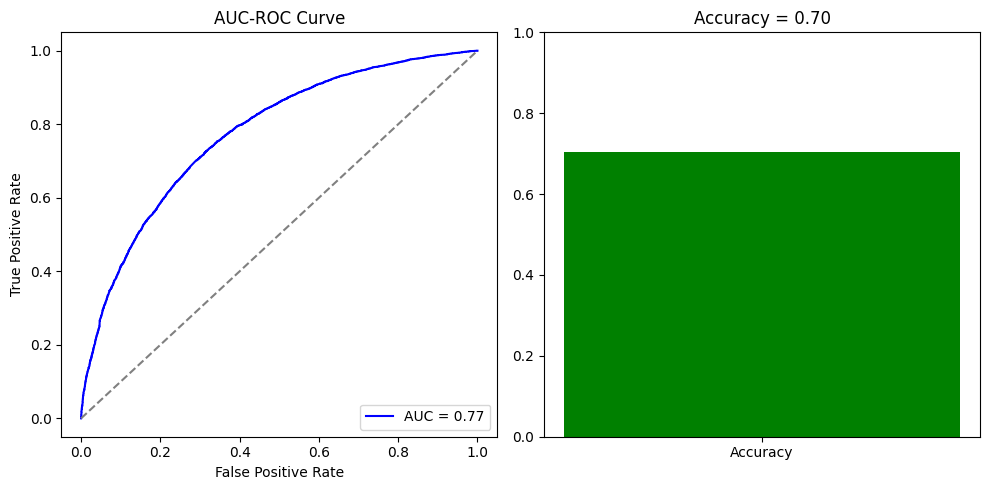

In [4]:
# Plot AUC-ROC and Accuracy Curves
def plot_auc_roc(train_features, train_labels, svm_classifier):
    # Predict probabilities for AUC-ROC
    probs = svm_classifier.predict_proba(train_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(train_labels, probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))

    # Plot AUC-ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC Curve')
    plt.legend(loc="lower right")
 # Plot Accuracy
    plt.subplot(1, 2, 2)
    accuracy = accuracy_score(train_labels, svm_classifier.predict(train_features))
    plt.bar(['Accuracy'], [accuracy], color='green')
    plt.ylim(0, 1)
    plt.title(f'Accuracy = {accuracy:.2f}')
    
    plt.tight_layout()
    plt.show()

# Plot the AUC-ROC and accuracy
plot_auc_roc(train_features, train_labels, svm_classifier)

   


In [10]:
# Example 
image_path = r'real_vs_fake\real-vs-fake\test\fake\0ABCBZ0CWN.jpg' 
result, confidence = predict_image(image_path, feature_extractor_model, svm_classifier)
print(f"Prediction: {result} image, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Prediction: Fake image, Confidence: 0.53


<h1>USING YOLOV10</h1>

In [2]:
pip install ultralytics

  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
   ---------------------------------------- 0.0/887.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/887.4 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/887.4 kB ? eta -:--:--
   ---------------------------------------- 887.4/887.4 kB 2.0 MB/s eta 0:00:00
Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl (156 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
